In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Circuit Duration Speedups (Fig. 6)

In [2]:
with open('data/speedup_data_normalized.pickle', 'rb') as handle:
    speedup_data_normalized = pickle.load(handle)

In [3]:
circuit_names = list(speedup_data_normalized.keys())
bar_heights1 = []
bar_heights2 = []
for circuit in speedup_data_normalized:
    bar_heights1.append(1/speedup_data_normalized[circuit]['base-transv']['total'])
    bar_heights2.append(1/speedup_data_normalized[circuit]['dp-transv']['total'])

geomean1 = np.array(bar_heights1).prod()**(1/(len(bar_heights1)))
geomean2 = np.array(bar_heights2).prod()**(1/(len(bar_heights2)))
bar_heights1.append(geomean1)
bar_heights2.append(geomean2)
circuit_names.append('geomean')

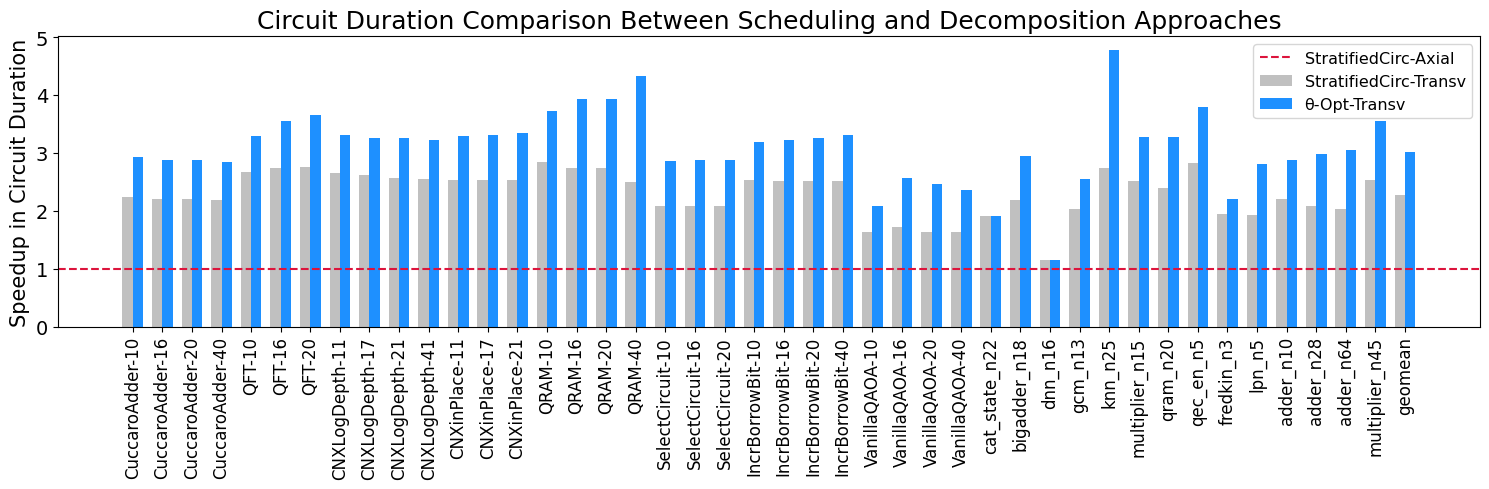

In [4]:
fig, ax = plt.subplots(figsize=(15,5))

bar_width = 0.35
x = np.arange(len(circuit_names))
ax.bar(x - bar_width/2, bar_heights1, bar_width, label='StratifiedCirc-Transv', color='silver')
ax.bar(x + bar_width/2, bar_heights2, bar_width, label='θ-Opt-Transv', color='dodgerblue')
ax.set_xticks(x)
ax.set_xticklabels(circuit_names, rotation=90, fontsize=12)

ax.axhline(1, linestyle='--', color='crimson', label='StratifiedCirc-Axial')

ax.set_ylabel('Speedup in Circuit Duration', fontsize=15)
ax.set_title('Circuit Duration Comparison Between Scheduling and Decomposition Approaches', fontsize=18)

ax.legend(fontsize=11.5)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('results_duration_speedups',bbox_inches='tight',dpi=300)
plt.show()

## Fidelity Improvement (Fig. 7)

In [5]:
with open('data/fidelity_improvement_data.pickle', 'rb') as handle:
    fid_improvement_data = pickle.load(handle)

In [6]:
circuit_names = fid_improvement_data.keys()
fid_improvements = [fid_improvement_data[circuit_name] for circuit_name in circuit_names]

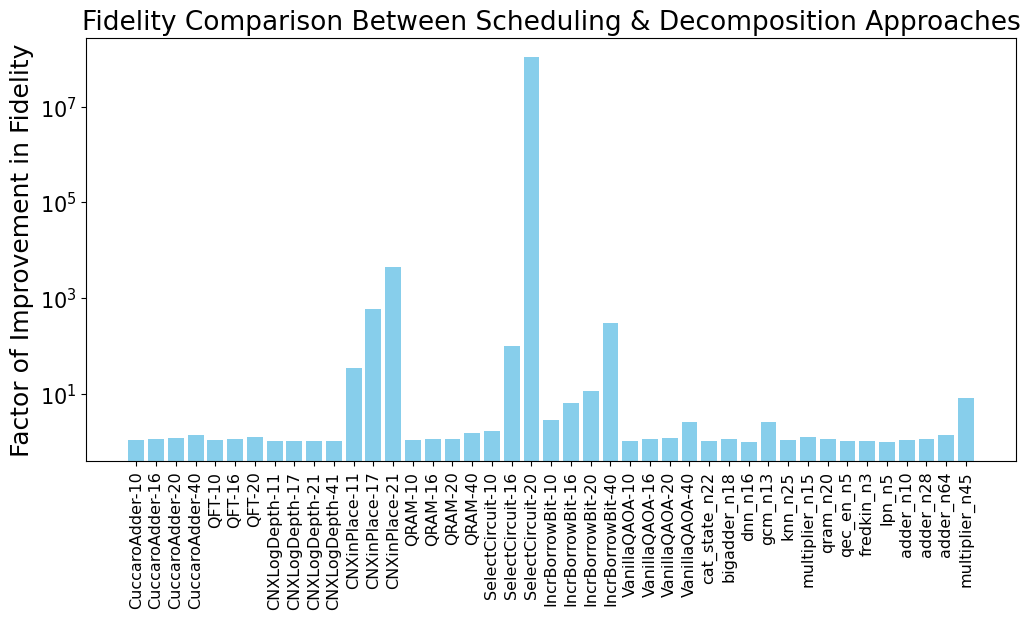

In [7]:
plt.figure(figsize=(12,5.5))
plt.bar(circuit_names, fid_improvements, color='skyblue')
plt.xticks(fontsize=11.5,rotation=90)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('Factor of Improvement in Fidelity', fontsize=18)
plt.title('Fidelity Comparison Between Scheduling & Decomposition Approaches', fontsize=19)
plt.savefig('results_fidelities',bbox_inches='tight',dpi=300)
plt.show()

## Varying Connectivity (Fig. 8)

In [13]:
def plot_varying_connectivity(data,figsize=(15,5),bar_width=0.55,hatch_pattern='X',ha='right',rotation=45,
                              spacing_between_bars=0.1,spacing_between_connectivities=0.5,spacing_between_circuits=1.5,
                              legend_fontsize=14,title_fontsize=18,x_ax_fontsize=12,y_ax_fontsize=12,ytick_fontsize=12,
                              savefig=False,savefig_title='results_connectivity',dpi=300):
    bars_data = []
    x_bar_pos = []
    xtick_pos = []
    xtick_labels = []
    curr_x_pos = 0

    for circuit_name in data:
        for connectivity in data[circuit_name]:
            xtick_pos.append(curr_x_pos)
            xtick_labels.append('[' + circuit_name + '; ' + str(connectivity) + ']')

            x_bar_pos.append(curr_x_pos - bar_width/2 - spacing_between_bars/2)
            bars_data.append(data[circuit_name][connectivity]['base-axial'])

            x_bar_pos.append(curr_x_pos + bar_width/2 + spacing_between_bars/2)
            bars_data.append(data[circuit_name][connectivity]['dp-transv'])

            curr_x_pos += 2*bar_width + spacing_between_bars + spacing_between_connectivities
        curr_x_pos += spacing_between_circuits

    ylabel = 'Circuit Duration (microseconds)'
    title =  'Scheduling & Decomposition Strategies for Different Connectivity'
    colors = {'rz': 'crimson', 'gr': 'dodgerblue', 'cz': 'silver'}
    legend_labels = {'rz': 'Local Rz Rotations','gr': 'Global Rx/Ry Rotations','cz': 'Two-Qubit (CZ) Gates'}
    
    ydata = {'gr': [], 'rz': [], 'cz': []}
    for i in range(len(bars_data)):
        for gate_type in ydata:
            ydata[gate_type].append(bars_data[i][gate_type])

    fig, ax = plt.subplots(figsize=figsize)
    bottom_data = np.array([0 for i in range(len(ydata['rz']))], dtype='float64')
    for idx, gate_type in enumerate(ydata):  # Iterate over the index and value of ydata
        ax.bar(x_bar_pos, ydata[gate_type], bar_width, bottom=bottom_data,
               label=legend_labels[gate_type], color=colors[gate_type])#, hatch=hatch_pattern if idx%2==0 else '')
        bottom_data += np.array(ydata[gate_type])

    idx=0
    for bar in ax.patches:
        bar.set_hatch(hatch_pattern if idx%2==1 else '')
        idx+=1

    ax.set_ylabel(ylabel, fontsize=y_ax_fontsize)
    ax.set_title(title, fontsize=title_fontsize)
    ax.legend(fontsize=legend_fontsize)
    plt.xticks(ticks=xtick_pos, labels=xtick_labels, fontsize=x_ax_fontsize, rotation=rotation, ha=ha)
    plt.yticks(fontsize=ytick_fontsize)
    if savefig:
        plt.savefig(savefig_title, bbox_inches='tight', dpi=dpi)
    plt.show()

In [15]:
# load data; dict is organized as data[circuit_name][connectivity][sched_decomp_type]
# connectivity here is specified as ratio of blockade radius to atom spacing

with open('data/connectivity_data.pickle', 'rb') as handle:
    connectivity_data = pickle.load(handle)

# For the sake of having a plot that is easy to read, we only include some circuits.
# Other circuits show similar trends to the ones displayed in this plot. 

circuits_to_plot = ['knn_n25','CuccaroAdder-20','QFT-20','QRAM-20']
connectivities_to_plot = [1,2,5]
data_to_plot = {}
for circuit_name in circuits_to_plot:
    data_to_plot[circuit_name] = {connectivity: connectivity_data[circuit_name][connectivity]
                                 for connectivity in connectivities_to_plot}

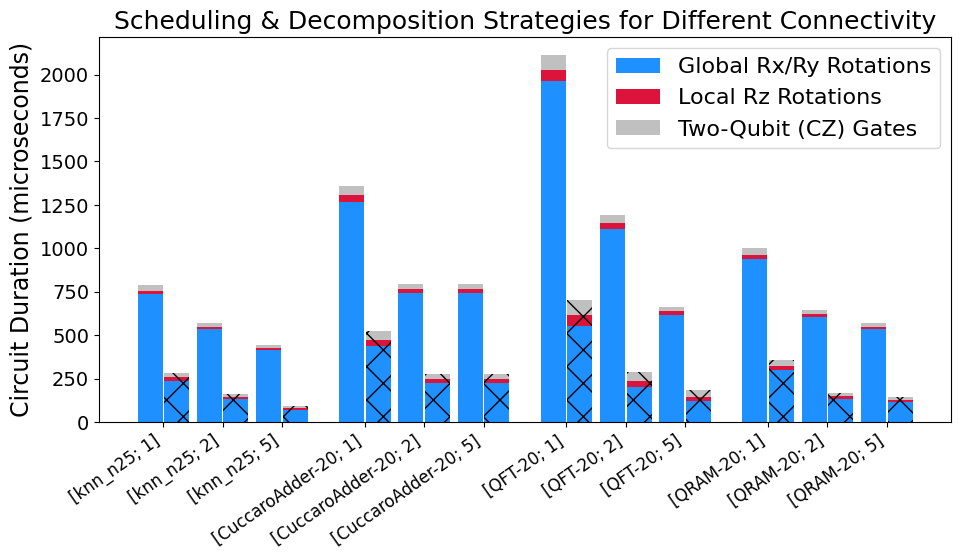

In [11]:
figsize = (11,5)
bar_width=1.6
hatch_pattern='X'
rotation=35
spacing_between_bars=0.1
spacing_between_connectivities=0.5
spacing_between_circuits=1.5
legend_fontsize=16
title_fontsize=18
x_ax_fontsize=12
y_ax_fontsize=17
ytick_fontsize=14
savefig=True

plot_varying_connectivity(data_to_plot,figsize=figsize, bar_width=bar_width, hatch_pattern=hatch_pattern, rotation=rotation,
                          spacing_between_bars=spacing_between_bars, spacing_between_connectivities=spacing_between_connectivities, 
                          spacing_between_circuits=spacing_between_circuits, legend_fontsize=legend_fontsize, title_fontsize=title_fontsize,
                          x_ax_fontsize=x_ax_fontsize, y_ax_fontsize=y_ax_fontsize, ytick_fontsize=ytick_fontsize, savefig=savefig)